**BUILD AN ANN MODEL FOR DRUG CLASSIFICATION**

This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ration (Na_to_K), drug type and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features. 

TASK 1: Read the dataset and do data preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ARITIFICAL_INTELLIGENCE_SMARTBRIDGE/drug200.csv')

In [ ]:
#visualizing the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

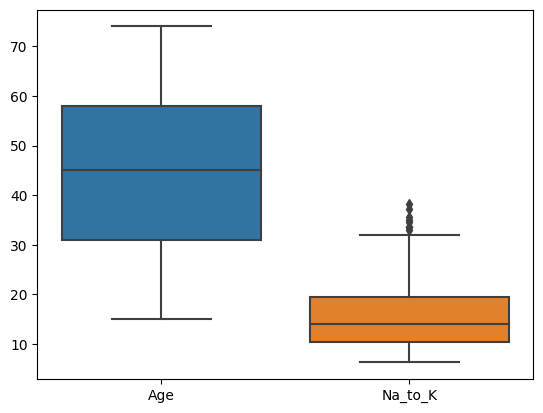

In [ ]:
sns.boxplot(df)

In [ ]:
#Outlier removal using IQR
Q1=df.Na_to_K.quantile(0.25)
Q3=df.Na_to_K.quantile(0.75)
IQR=Q3-Q1
upperlimit=Q3+1.5*IQR
lowerlimit=Q1-1.5*IQR
df=df[df.Na_to_K<upperlimit]

<Axes: >

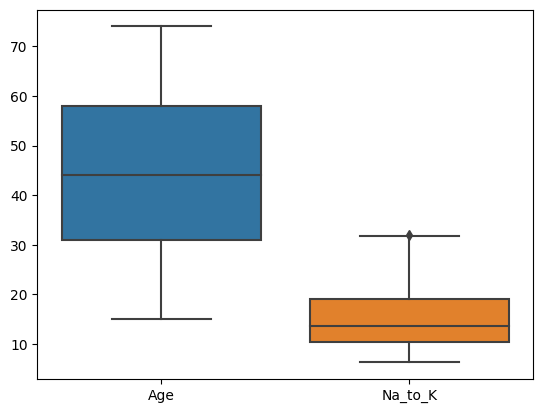

In [ ]:
sns.boxplot(df)

In [ ]:
df['Drug'].value_counts()

DrugY    83
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
# Splitting the data

#Step 1: Split dependent and independent data
#Step 2: Split training and testing split

In [ ]:
x=df.iloc[:,0:5] #row and the column
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder() #initialize the lib

In [ ]:
x['Sex']=le.fit_transform(x['Sex'])
x['BP']=le.fit_transform(x['BP'])
x['Cholesterol']=le.fit_transform(x['Cholesterol'])
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [ ]:
y=df.iloc[:,5:6]
y[0:2]

,Drug
0,DrugY
1,drugC


In [ ]:
#Split the training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
xtrain.shape,xtest.shape

((153, 5), (39, 5))

In [ ]:
ytrain.shape,ytest.shape

((153, 1), (39, 1))

TASK 2: Build the ANN model with (input layer, min 3 hidden layers and output layer)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels into integers
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)

# Convert target variable to one-hot encoded format
ytrain_encoded = to_categorical(ytrain_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
 # Define the ANN model
model = Sequential()
model.add(Dense(5, activation="relu"))  # Input layer
model.add(Dense(64, activation="relu"))  # Hidden layer 1
model.add(Dense(32, activation="relu"))  # Hidden layer 2
model.add(Dense(16, activation="relu"))  # Hidden layer 3
model.add(Dense(5, activation="softmax"))  # Output layer


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(xtrain, ytrain_encoded, batch_size=4, epochs=10)

Epoch 1/10
39/39 [==============================] - 2s 4ms/step - loss: 2.3436 - accuracy: 0.3333
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 1.4891 - accuracy: 0.5229
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 1.2811 - accuracy: 0.5163
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.5425
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 1.2177 - accuracy: 0.4902
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1548 - accuracy: 0.5359
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 1.1624 - accuracy: 0.5359
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1678 - accuracy: 0.5098
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1226 - accuracy: 0.5229
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1348 - accuracy: 0.5098


In [218]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 5)                 30        
                                                                 
 dense_85 (Dense)            (None, 64)                384       
                                                                 
 dense_86 (Dense)            (None, 32)                2080      
                                                                 
 dense_87 (Dense)            (None, 16)                528       
                                                                 
 dense_88 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,107
Trainable params: 3,107
Non-trainable params: 0
_________________________________________________________________


TASK 3: Test the model wth random data

In [237]:
s1=pd.Series([23,'F','HIGH','HIGH', 25.355])
s2=pd.Series([23,'F','NORMAL','HIGH', 25.355])
s3=pd.Series([23,'M','HIGH','NORMAL', 25.355])
rand=pd.DataFrame([s1,s2,s3])
rand.columns=['Age','Sex','BP','Cholesterol','Na_to_K']
rand

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,23,F,NORMAL,HIGH,25.355
2,23,M,HIGH,NORMAL,25.355


In [241]:
rand['Sex']=le.fit_transform(rand['Sex'])
rand['BP']=le.fit_transform(rand['BP'])
rand['Cholesterol']=le.fit_transform(rand['Cholesterol'])
rand

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,23,0,1,0,25.355
2,23,1,0,1,25.355


In [242]:
predictions = model.predict(rand)
predictions

1/1 [==============================] - 0s 23ms/step


array([[0.8409971 , 0.04590454, 0.00595436, 0.02205824, 0.08508582],
       [0.8809574 , 0.03364423, 0.00338472, 0.01475022, 0.06726336],
       [0.838279  , 0.04673946, 0.00615508, 0.0225824 , 0.08624395]],
      dtype=float32)